In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lexset/synthetic-asl-alphabet")

print("Path to dataset files:", path)

c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\ADMIN\.cache\kagglehub\datasets\lexset\synthetic-asl-alphabet\versions\3


In [7]:
import os

dataset_path = path

# Check top-level contents
print("Top-level contents:")
print(os.listdir(dataset_path))

Top-level contents:
['alphabet.jpg', 'Test_Alphabet', 'Train_Alphabet']


In [8]:
images_path = os.path.join(dataset_path, "Test_Alphabet/A")
if os.path.exists(images_path):
    print("Number of images:", len(os.listdir(images_path)))
    print("First 5 images:", os.listdir(images_path)[:5])
else:
    print("'images' folder not found")

Number of images: 100
First 5 images: ['081a8b28-7394-4254-95aa-e40f7c8989c8.rgb_0000.png', '09a13b4f-b68f-43fd-86e3-5644224490a2.rgb_0000.png', '09ea96a0-eb7b-4ce5-8a50-b33f345bc9ef.rgb_0000.png', '0de66b7e-1449-4079-bf2c-935ec261ddcb.rgb_0000.png', '103a0979-29c7-4519-b341-1d58e3156f92.rgb_0000.png']


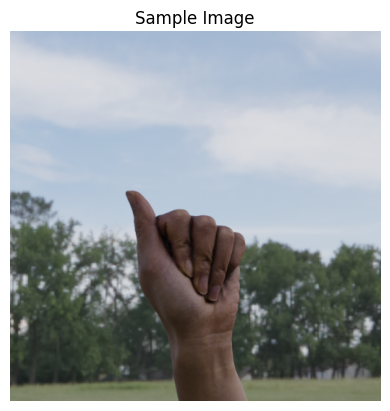

In [9]:
from PIL import Image
import matplotlib.pyplot as plt

sample_image_path = os.path.join(images_path, os.listdir(images_path)[0])
img = Image.open(sample_image_path)

plt.imshow(img)
plt.axis('off')
plt.title('Sample Image')
plt.show()

In [10]:
import os
import shutil

# Get the actual dataset path from kagglehub
read_only_path = path  # From kagglehub
writable_path = os.path.join(os.getcwd(), "asl-classification-data")

# 1. Copy dataset to a local writable path if not already there
if not os.path.exists(writable_path):
    shutil.copytree(read_only_path, writable_path)
    print("Copied dataset to:", writable_path)
else:
    print("Writable path already exists:", writable_path)

# 2. Print contents to verify folder names
print("Contents of writable_path:", os.listdir(writable_path))

# 3. Rename folders only if they exist
old_train = os.path.join(writable_path, "Train_Alphabet")
old_test = os.path.join(writable_path, "Test_Alphabet")
new_train = os.path.join(writable_path, "train")
new_test = os.path.join(writable_path, "val")

if os.path.exists(old_train):
    os.rename(old_train, new_train)
    print("Renamed Train_Alphabet → train")
else:
    print("Train_Alphabet not found!")

if os.path.exists(old_test):
    os.rename(old_test, new_test)
    print("Renamed Test_Alphabet → val")
else:
    print("Test_Alphabet not found!")


Writable path already exists: c:\Users\ADMIN\Desktop\engg2112\asl-classification-data
Contents of writable_path: ['alphabet.jpg', 'train', 'val']
Train_Alphabet not found!
Test_Alphabet not found!


In [11]:
%pip install -q ultralytics

Note: you may need to restart the kernel to use updated packages.


In [5]:
import torch
print(torch.cuda.is_available())  # Should return True if CUDA is available


False


In [6]:
import torch

print("CUDA available:", torch.cuda.is_available())

if torch.cuda.is_available():
    print("Device:", torch.cuda.get_device_name(0))
else:
    print("CUDA not available. Using CPU.")


CUDA available: False
CUDA not available. Using CPU.


In [12]:
import os
import subprocess

# Versions and model names
yolo_versions = {
    "yolov8m-cls.pt": "v8m",
    "yolov8s-cls.pt": "v8s",
    "yolov8l-cls.pt": "v8l"
}

# Paths
data_path = "/kaggle/working/asl-classification-data"
base_save_dir = "/kaggle/working/runs/classify"

results = []

# Train and evaluate each YOLO version
for model_name, version in yolo_versions.items():
    save_dir = f"{base_save_dir}/asl_{version}"
    print(f"🧠 Training YOLO{version.upper()}...")

    # Train
    subprocess.run([
        "yolo", "task=classify", "mode=train",
        f"model={model_name}",
        f"data={data_path}",
        "epochs=7",
        "imgsz=224",
        f"project={base_save_dir}",
        f"name=asl_{version}",
        "patience=3",
        "verbose=False"
    ], check=True)

    # Evaluate
    print(f"🔍 Evaluating YOLO{version.upper()}...")
    result = subprocess.run([
        "yolo", "task=classify", "mode=val",
        f"model={save_dir}/weights/best.pt",
        f"data={data_path}"
    ], capture_output=True, text=True)

    print(result.stdout)
    results.append((version, result.stdout))

# Summary (just basic console printout)
print("\n✅ All versions evaluated.\n")

for version, output in results:
    print(f"=== YOLO{version.upper()} Results ===")
    for line in output.split("\n"):
        if "accuracy" in line.lower() or "precision" in line.lower():
            print(line)
    print()

🧠 Training YOLOV8M...


CalledProcessError: Command '['yolo', 'task=classify', 'mode=train', 'model=yolov8m-cls.pt', 'data=/kaggle/working/asl-classification-data', 'epochs=7', 'imgsz=224', 'project=/kaggle/working/runs/classify', 'name=asl_v8m', 'patience=3', 'verbose=False']' returned non-zero exit status 1.

In [ ]:
# Path to the directory you want to zip
source_dir = "/kaggle/working/runs"
zip_path = "/kaggle/working/runs_archive"

# Create zip archive (it will become runs_archive.zip)
shutil.make_archive(zip_path, 'zip', source_dir)

# Confirm
print("✅ Zipped successfully:", zip_path + ".zip")

✅ Zipped successfully: /kaggle/working/runs_archive.zip


In [ ]:
# Create a subdirectory
target_dir = "content"
os.makedirs(target_dir, exist_ok=True)

# Move the zip
shutil.move("/kaggle/working/runs_archive.zip", f"{target_dir}/runs_archive.zip")

# Confirm
print("Moved to:", f"{target_dir}/runs_archive.zip")

Moved to: content/runs_archive.zip


/kaggle/working/runs_archive.zip

In [7]:
from torchvision import transforms
from torch.utils.data import DataLoader

# Define transformations (resizing, normalization, etc.)
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomRotation(30),      # Random rotation
    transforms.ColorJitter(brightness=0.2, contrast=0.2),  # Color jitter
    transforms.Resize((224, 224)),      # Resize images
    transforms.ToTensor(),              # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize
])


In [8]:
import cv2
import numpy as np

def apply_gaussian_blur(image):
    return cv2.GaussianBlur(image, (5, 5), 0)


In [11]:
from ultralytics import YOLO

# Load a pre-trained YOLOv8 model (e.g., YOLOv8 small model)
model = YOLO('yolov8n.pt')  # use 'yolov8s.pt', 'yolov8m.pt', 'yolov8l.pt', or 'yolov8x.pt' for larger models

# Run inference on an image
results = model("image.jpg") 
# Display results
results.show()  # This will display the image with bounding boxes

# Access predictions
boxes = results.pred[0]  # Bounding boxes
confidences = boxes[:, 4]  # Confidence scores


FileNotFoundError: image.jpg does not exist